In [64]:
%matplotlib inline

import geopandas
from libpysal import examples
import pysal
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mapclassify

### below work based on: https://darribas.org/gds_course/content/bD/lab_D.html

In [10]:
examples.builtin_datasets

{'10740': <libpysal.examples.builtin.LocalExample at 0x7fba8945bfd0>,
 'arcgis': <libpysal.examples.builtin.LocalExample at 0x7fba8945bf50>,
 'baltim': <libpysal.examples.builtin.LocalExample at 0x7fba8945be10>,
 'berlin': <libpysal.examples.builtin.LocalExample at 0x7fba8945bf90>,
 'book': <libpysal.examples.builtin.LocalExample at 0x7fba8945be90>,
 'burkitt': <libpysal.examples.builtin.LocalExample at 0x7fba8945bed0>,
 'calemp': <libpysal.examples.builtin.LocalExample at 0x7fba8945bf10>,
 'chicago': <libpysal.examples.builtin.LocalExample at 0x7fba8945f190>,
 'columbus': <libpysal.examples.builtin.LocalExample at 0x7fba8945f250>,
 'desmith': <libpysal.examples.builtin.LocalExample at 0x7fba8945f050>,
 'geodanet': <libpysal.examples.builtin.LocalExample at 0x7fba8945f290>,
 'georgia': <libpysal.examples.builtin.LocalExample at 0x7fba8945f390>,
 'juvenile': <libpysal.examples.builtin.LocalExample at 0x7fba8945f790>,
 'Line': <libpysal.examples.builtin.LocalExample at 0x7fba8945f150>,
 

In [11]:
examples.remote_datasets

{'AirBnB': <libpysal.examples.base.Example at 0x7fba8944cd50>,
 'Atlanta': <libpysal.examples.base.Example at 0x7fba8944cd90>,
 'Baltimore': <libpysal.examples.base.Example at 0x7fba8944ced0>,
 'Bostonhsg': <libpysal.examples.base.Example at 0x7fba8944cfd0>,
 'Buenosaires': <libpysal.examples.base.Example at 0x7fba89453110>,
 'Charleston1': <libpysal.examples.base.Example at 0x7fba89453310>,
 'Charleston2': <libpysal.examples.base.Example at 0x7fba89453410>,
 'Chicago Health': <libpysal.examples.base.Example at 0x7fba89453510>,
 'Chicago commpop': <libpysal.examples.base.Example at 0x7fba89453610>,
 'Chicago parcels': <libpysal.examples.base.Example at 0x7fba89453750>,
 'Chile Labor': <libpysal.examples.base.Example at 0x7fba89453990>,
 'Chile Migration': <libpysal.examples.base.Example at 0x7fba89453b10>,
 'Cincinnati': <libpysal.examples.base.Example at 0x7fba89453950>,
 'Cleveland': <libpysal.examples.base.Example at 0x7fba89453c90>,
 'Columbus': <libpysal.examples.base.Example at 0

In [33]:
examples.explain('georgia')

georgia

Various socio-economic variables for counties within the state of Georgia (1990)
-------------------------------------------------------------------------------

* G_utm.shp: attribute and geometry data. (n=159, k=17)

For testing against GWR4 GUI software
-------------------------------------

* georgia_BS_NN_listwise.csv: bisquare nearest neighbor kernel model output
* georgia_BS_NN_summary.txt: bisquare nearest neighbor kernel model summary
* georgia_BS_NN.ctl: bisquare nearest neighbor kernel control file

* georgia_GS_NN_listwise.csv: Gaussian nearest neighbor kernel model output
* georgia_GS_NN_summary.txt: Gaussian nearest neighbor kernel model summary
* georgia_GS_NN.ctl: Gaussian nearest neighbor kernel control file

* georgia_BS_F_listwise.csv: bisquare fixed kernel model output
* georgia_BS_F_summary.txt: bisquare fixed kernel model summary
* georgia_BS_F.ctl: bisquare fixed kernel control file

* georgia_GS_F_listwise.csv: Gaussian fixed kernel model output
* georg

In [34]:
georgia = examples.load_example("georgia")
georgia.get_file_list()

['/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/libpysal/examples/georgia/GData_utm.csv',
 '/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/libpysal/examples/georgia/georgia_GS_NN_listwise.csv',
 '/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/libpysal/examples/georgia/FB.p',
 '/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/libpysal/examples/georgia/georgia_GS_NN.ctl',
 '/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/libpysal/examples/georgia/G_utm.sbx',
 '/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/libpysal/examples/georgia/G_utm.shx',
 '/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/libpysal/examples/georgia/georgia_BS_F.ctl',
 '/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/libpysal/examples/georgia/G_utm.shp',
 '/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/libpysal/examples/georgia/G_utm.cpg',
 '/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packag

In [42]:
db = geopandas.read_file(examples.get_path("G_utm.shp"))
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
AREA         159 non-null float64
PERIMETER    159 non-null float64
G_UTM_       159 non-null int64
G_UTM_ID     159 non-null int64
Latitude     159 non-null float64
Longitud     159 non-null float64
TotPop90     159 non-null int64
PctRural     159 non-null float64
PctBach      159 non-null float64
PctEld       159 non-null float64
PctFB        159 non-null float64
PctPov       159 non-null float64
PctBlack     159 non-null float64
X            159 non-null float64
Y            159 non-null int64
AreaKey      159 non-null int64
geometry     159 non-null geometry
dtypes: float64(11), geometry(1), int64(5)
memory usage: 21.2 KB


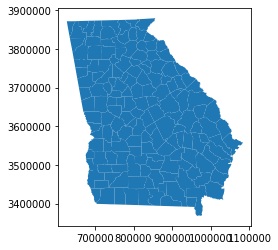

In [43]:
db.crs
db.plot()

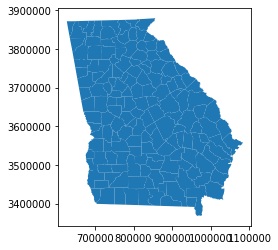

In [44]:
db.crs = "EPSG:26917"
db.plot()

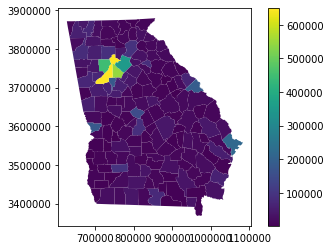

In [47]:
# continuous shading

db.plot(column="TotPop90", 
        categorical = False, 
        legend = True
       )

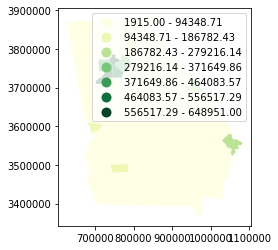

In [49]:
# eq interval

db.plot(column="TotPop90", 
        scheme="equal_interval", 
        k=7,
        cmap="YlGn",
        legend=True
       )

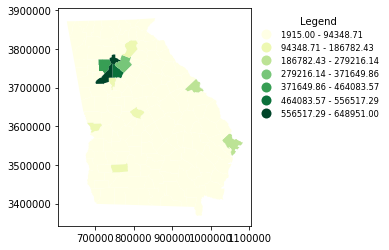

In [61]:
### let's move the legend out of the way

db.plot(column="TotPop90", 
        scheme="equal_interval", 
        k=7,
        cmap="YlGn",
        legend=True,
        legend_kwds=dict(loc='upper right',
                            bbox_to_anchor=(1.7, 1),
                            fontsize='small',
                            title="Legend",
                            frameon=False)
       )


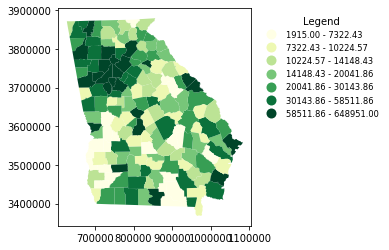

In [62]:
### quantiles

db.plot(column="TotPop90", 
        scheme="quantiles", 
        k=7,
        cmap="YlGn",
        legend=True,
        legend_kwds=dict(loc='upper right',
                            bbox_to_anchor=(1.7, 1),
                            fontsize='small',
                            title="Legend",
                            frameon=False)
       )

In [65]:
classi = mapclassify.Quantiles(db["TotPop90"], k=7)
classi

Quantiles                     

       Interval          Count
------------------------------
[  1915.00,   7322.43] |    23
(  7322.43,  10224.57] |    23
( 10224.57,  14148.43] |    22
( 14148.43,  20041.86] |    23
( 20041.86,  30143.86] |    22
( 30143.86,  58511.86] |    23
( 58511.86, 648951.00] |    23

In [66]:
classi.bins

array([  7322.42857143,  10224.57142857,  14148.42857143,  20041.85714286,
        30143.85714286,  58511.85714286, 648951.        ])

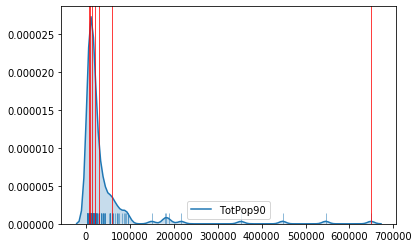

In [67]:
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(db["TotPop90"], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(db["TotPop90"], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

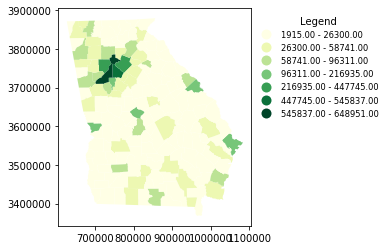

In [68]:
### jenks

db.plot(column="TotPop90", 
        scheme="fisher_jenks", 
        k=7,
        cmap="YlGn",
        legend=True,
        legend_kwds=dict(loc='upper right',
                            bbox_to_anchor=(1.7, 1),
                            fontsize='small',
                            title="Legend",
                            frameon=False)
       )

In [69]:
classi = mapclassify.FisherJenks(db["TotPop90"], k=7)
classi

FisherJenks                   

       Interval          Count
------------------------------
[  1915.00,  26300.00] |   109
( 26300.00,  58741.00] |    28
( 58741.00,  96311.00] |    13
( 96311.00, 216935.00] |     5
(216935.00, 447745.00] |     2
(447745.00, 545837.00] |     1
(545837.00, 648951.00] |     1

(700000, 800000)

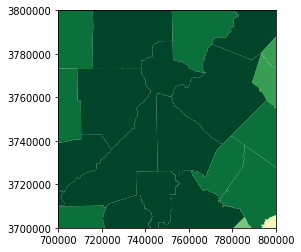

In [72]:
### Zoom in example

# Setup the figure
f, ax = plt.subplots(1)
# Draw the choropleth
db.plot(column="TotPop90", 
        scheme="quantiles", 
        k=7,
        cmap="YlGn",
        legend=False,
        ax=ax
       )
# Redimensionate X and Y axes to desired bounds - zoom into ATL area
ax.set_ylim(3700000, 3800000)
ax.set_xlim(700000, 800000)